# Análise de Dados Global de Vendas de Carro

O dataset analisado contém 50 mil registros e 7 colunas, representando as vendas de carros em nível global.
Cada linha corresponde a uma venda individual, com informações sobre marca, modelo, fábrica de origem, tipo de combustível, ano de fabricação e preço do veículo.

O objetivo deste estudo é identificar os carros mais vendidos, as marcas com maior volume de vendas por ano e realizar uma comparação de desempenho com base no tipo de motor (combustível).

## Importando e acessando os dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df_car = pd.read_csv('car_sales_data.csv')
df_car

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101
...,...,...,...,...,...,...,...
49995,BMW,M5,5.0,Petrol,2018,28664,113006
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852
49998,Ford,Focus,1.0,Diesel,2016,26468,23630


In [ ]:
df_car.rename(columns={'Manufacturer':'Marca', 'Model':'Modelo','Engine size':'Motor', 'Fuel type':'Combustivel','Year of manufacture':'Ano','Mileage':'Quilometragem','Price':'Preço'},inplace=True)
df_car
#Renomenando as Colunas

,Marca,Modelo,Motor,Combustivel,Ano,Quilometragem,Preço
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101
...,...,...,...,...,...,...,...
49995,BMW,M5,5.0,Petrol,2018,28664,113006
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852
49998,Ford,Focus,1.0,Diesel,2016,26468,23630


# Descrição do Dataset

|Nome | Descrição | Tipo do Dado |
|----|-----|-----|
|Marca | Marca que fez o carro | `string` |
|Modelo| Modelo do carro | `string`
|Motor| Motor do carro | `float64`
|Cumbistvel| Tipó de Combustivel de cada carro | `object`
|Ano| Ano de Fabricação | `string`
|Quilometragem| Quilometragem da cada carro | `string`
|Preço| Prçeo de venda | `string`

In [ ]:
df_car.describe().round(2)
#Temos aqui alguns dados estatísticos de cada coluna.

,Motor,Ano,Quilometragem,Preço
count,50000.00,50000.00,50000.00,50000.00
mean,1.77,2004.21,112497.32,13828.90
std,0.73,9.65,71632.52,16416.68
min,1.00,1984.00,630.00,76.00
25%,1.40,1996.00,54352.25,3060.75
50%,1.60,2004.00,100987.50,7971.50
75%,2.00,2012.00,158601.00,19026.50
max,5.00,2022.00,453537.00,168081.00


In [ ]:
df_car[(df_car['Preço'] <400) & (df_car['Quilometragem'] <= 300000)]

,Marca,Modelo,Motor,Combustivel,Ano,Quilometragem,Preço
281,Ford,Focus,1.0,Petrol,1985,288486,347
310,Ford,Fiesta,1.4,Petrol,1986,263206,384
619,Ford,Fiesta,1.4,Petrol,1988,289688,342
951,Ford,Focus,1.4,Diesel,1985,296935,398
1427,VW,Polo,1.2,Petrol,1986,294369,272
...,...,...,...,...,...,...,...
48114,Ford,Fiesta,1.4,Petrol,1987,291257,315
48207,Toyota,Yaris,1.0,Hybrid,1988,298017,371
48571,Ford,Fiesta,1.0,Petrol,1988,285782,300
48965,Toyota,Yaris,1.0,Hybrid,1986,294982,334


In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Marca          50000 non-null  object 
 1   Modelo         50000 non-null  object 
 2   Motor          50000 non-null  float64
 3   Combustivel    50000 non-null  object 
 4   Ano            50000 non-null  int64  
 5   Quilometragem  50000 non-null  int64  
 6   Preço          50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


#Value_counts e Unique

In [ ]:
df_car['Marca'].value_counts()
#Quantidade de carros vendidos por Fábricas

,count
Marca,
Ford,14959
VW,14913
Toyota,12554
BMW,4965
Porsche,2609


In [ ]:
df_car['Modelo'].unique()
#Modelos de carros vendidos (sendo únicos)

array(['Fiesta', '718 Cayman', 'Mondeo', 'RAV4', 'Polo', 'Focus', 'Prius',
       'Golf', 'Z4', 'Yaris', '911', 'Passat', 'M5', 'Cayenne', 'X3'],
      dtype=object)

# Groupby e Sort_values()

In [ ]:
df_car.groupby('Modelo').size().sort_values(ascending=False)
#Modelos de carros venididos e quantidades

,0
Modelo,
Mondeo,5058
Golf,5050
Polo,4992
Focus,4976
Fiesta,4925
Passat,4871
RAV4,4292
Prius,4171
Yaris,4091


In [ ]:
df_car.groupby('Modelo')['Preço'].describe()
#Fazendo agrupamento pelo modelo e preço. E fazer uma descrição da estatística

,count,mean,std,min,25%,50%,75%,max
Modelo,,,,,,,,
718 Cayman,867.0,21527.666667,20657.663154,266.0,5068.50,14031.0,32337.00,100738.0
911,872.0,37024.724771,34587.141961,652.0,9916.50,24706.5,55185.00,167774.0
Cayenne,870.0,28714.568966,26796.456744,635.0,7237.25,17936.5,46229.75,125357.0
Fiesta,4925.0,7197.324873,6832.088025,85.0,1823.00,4516.0,10955.00,35678.0
Focus,4976.0,11790.282757,11199.166547,156.0,2930.75,7599.5,18021.25,58407.0
Golf,5050.0,10364.220792,9873.047993,135.0,2640.50,6576.5,15721.25,53754.0
M5,1645.0,39911.110638,38455.053111,331.0,9741.00,25022.0,59779.00,168081.0
Mondeo,5058.0,12956.009292,12095.711088,129.0,3391.00,8543.5,19601.00,62748.0
Passat,4871.0,12893.126052,12298.796788,122.0,3257.00,8231.0,19434.00,58588.0


In [ ]:
df_car.groupby('Marca')['Preço'].describe()
#Fazendo agrupamento pela fábrica e preço. E fazer uma descrição da estatística

,count,mean,std,min,25%,50%,75%,max
Marca,,,,,,,,
BMW,4965.0,24429.459215,27901.217685,167.0,5318.00,14384.0,33592.00,168081.0
Ford,14959.0,10672.288723,10615.978148,85.0,2626.00,6646.0,15706.50,62748.0
Porsche,2609.0,29103.764661,28645.943628,266.0,7039.00,18441.0,43712.00,167774.0
Toyota,12554.0,14340.362275,14706.876784,176.0,3373.25,8802.0,20918.25,86353.0
VW,14913.0,10363.139274,10266.181643,76.0,2584.00,6428.0,15214.00,58588.0


In [ ]:
df_car.groupby(by='Ano')['Marca'].describe()


,count,unique,top,freq
Ano,,,,
1984,146,5,Ford,45
1985,328,5,Ford,102
1986,437,5,Ford,128
1987,605,5,Ford,197
1988,732,5,VW,241
1989,920,5,Ford,293
1990,1109,5,Ford,330
1991,1275,5,VW,400
1992,1326,5,VW,398


In [ ]:
df_car.sort_values(by='Ano', ascending=False).head(10)
# Ordena o DataFrame pelo preço em ordem decrescente, exibindo os 10 carros mais caros.

,Marca,Modelo,Motor,Combustivel,Ano,Quilometragem,Preço
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852
1873,BMW,Z4,2.4,Petrol,2022,5685,64221
1965,Ford,Mondeo,1.4,Hybrid,2022,6732,52560
1992,Ford,Mondeo,2.0,Diesel,2022,8345,54510
30240,VW,Polo,1.4,Petrol,2022,6573,31313
29644,Ford,Fiesta,1.2,Hybrid,2022,7734,33693
7857,Toyota,Prius,1.8,Hybrid,2022,9882,61423
30103,Toyota,RAV4,2.4,Hybrid,2022,7641,84344
49816,BMW,M5,4.0,Petrol,2022,3456,151208
44951,Ford,Mondeo,1.6,Diesel,2022,6961,49107


# Plotando um Gráfico com o Dataset

## Preço Médio por Modelo de Carro

In [ ]:
modelo_carro_preco = df_car.groupby('Model')['Price'].mean().sort_values(ascending=False)
modelo_carro_preco

,Price
Model,
M5,39911.110638
911,37024.724771
Cayenne,28714.568966
718 Cayman,21527.666667
RAV4,19433.170550
X3,17685.843137
Z4,15862.080569
Prius,14010.771038
Mondeo,12956.009292


In [ ]:
x = modelo_carro_preco.index       # nomes dos modelos
y = modelo_carro_preco.values      # preços médios


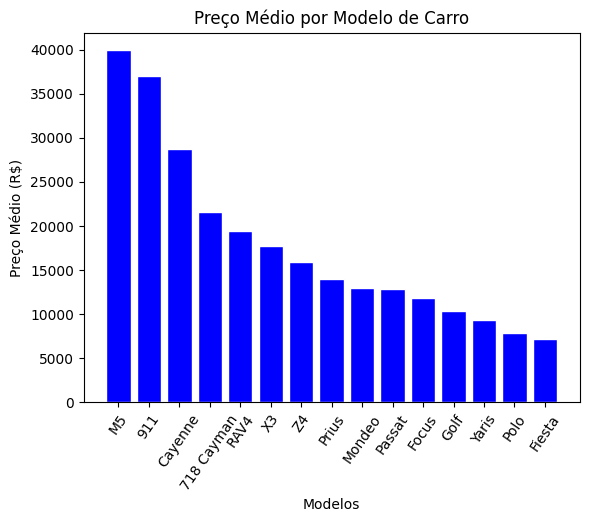

In [ ]:
plt.bar(x, y, color='blue', edgecolor='white')
plt.title('Preço Médio por Modelo de Carro')
plt.xlabel('Modelos')
plt.ylabel('Preço Médio (R$)')
plt.xticks(rotation=55)
plt.show()


## Quantidade de Carros Vendidos por Fábrica

In [ ]:
fabrica_carros_vendidos = df_car['Manufacturer'].value_counts()
fabrica_carros_vendidos

,count
Manufacturer,
Ford,14959
VW,14913
Toyota,12554
BMW,4965
Porsche,2609


In [ ]:
x = fabrica_carros_vendidos.index
y = fabrica_carros_vendidos.values

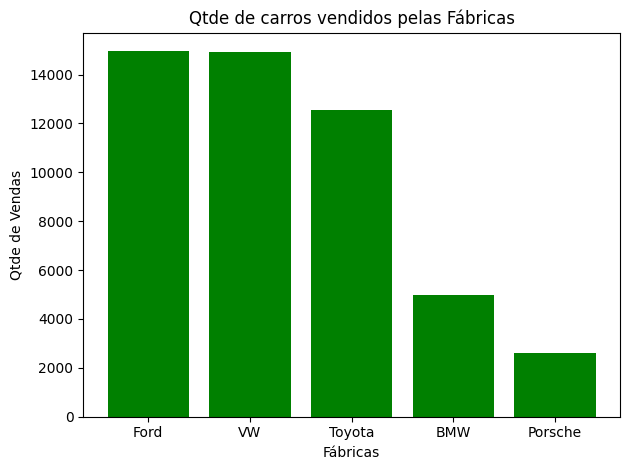

In [ ]:
plt.bar(x,y, color = 'green')
plt.title ('Qtde de carros vendidos pelas Fábricas')
plt.xlabel ('Fábricas')
plt.ylabel ('Qtde de Vendas')
plt.tight_layout()

## Venda de Carros por Ano

In [ ]:
ano_marca = df_car.groupby(['Marca','Ano']).size()
ano_marca

Marca  Ano 
BMW    1984     20
       1985     33
       1986     47
       1987     54
       1988     86
              ... 
VW     2018    512
       2019    356
       2020    270
       2021    169
       2022     81
Length: 195, dtype: int64

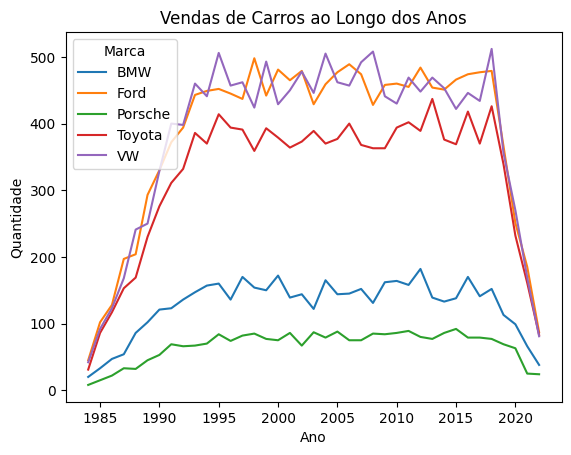

In [ ]:
tabela = ano_marca.unstack(level=0)
tabela.plot()
plt.title('Vendas de Carros ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.legend(title='Marca',loc='upper left')
plt.grid(False)


## Comparação de Vendas entre VW E Ford

In [ ]:
marcas =['VW','Ford']
df_filtrado = df_car[df_car['Marca'].isin(marcas)]
preco_ano = df_filtrado.groupby(['Marca','Ano'])['Preço'].mean().reset_index()
tabela = preco_ano.pivot(index='Ano', columns='Marca', values='Preço')
tabela

Marca,Ford,VW
Ano,,
1984,822.222222,693.023810
1985,724.362745,972.989130
1986,905.015625,900.186992
1987,1050.756345,986.321429
1988,1110.553922,1063.809129
1989,1327.348123,1241.932000
1990,1532.887879,1444.984802
1991,1577.158602,1587.535000
1992,1830.461929,1752.231156


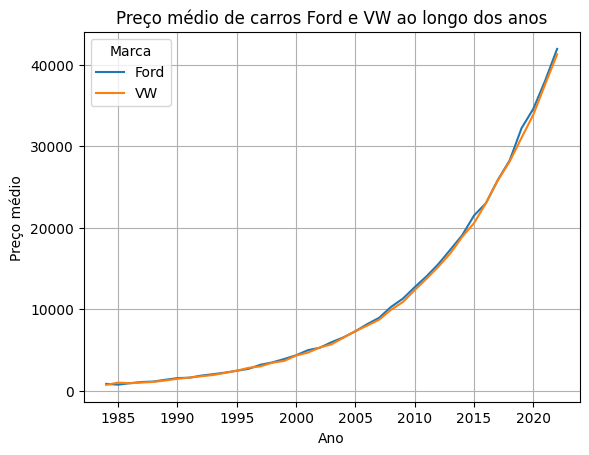

In [ ]:
import matplotlib.pyplot as plt

tabela.plot()
plt.title('Preço médio de carros Ford e VW ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Preço médio')
plt.legend(title='Marca', loc='upper left')  # legenda no canto superior esquerdo
plt.grid(True)
plt.show()


#Conclusão e Insights

Nesse DataSet me permitiu identificar os fabricantes com maior participação no conjunto de dados, sendo possível observar que alguns concentram a maior parte das vendas.

Ao agrupar os dados por preço, foi possível identificar os modelos mais caros, o que ajuda a compreender a faixa de valor praticada por diferentes marcas.

**Gráfico 1 – Média de preço por modelo:**
O Gráfico 1 apresenta a média de preços dos modelos de carros vendidos. Observa-se que os modelos M5, 911 e Cayenne, pertencentes às marcas BMW e Porsche, estão entre os veículos com maior valor médio. Apesar de possuírem baixo volume de vendas (como mostrado no Gráfico 2), esses modelos representam o segmento de produtos mais exclusivos e de alto padrão.

**Gráfico 2 – Quantidade de carros vendidos por fabricante:**
No Gráfico 2, é possível visualizar a quantidade de veículos vendidos por fábrica. As marcas Ford e Volkswagen (VW) se destacam com os maiores volumes de vendas. Logo abaixo do gráfico, foram calculados os valores médios de preço dessas duas fabricantes, mostrando que elas praticam preços mais acessíveis em comparação às marcas premium.

**Gráfico 3 – Vendas por ano e por marca**
O Gráfico 3 apresenta a quantidade de veículos vendidos por ano, separada por marca.
Nele, é possível identificar tendências ao longo do tempo, como crescimento ou queda nas vendas de determinadas marcas em períodos específicos. Marcas como Ford e VW continuam se destacando, mas nota-se que outras montadoras apresentam oscilações significativas, o que pode estar relacionado a lançamentos, mudanças de mercado ou crises econômicas globais.

**Gráfico 4 – Evolução do preço médio (Ford x VW)**
O Gráfico 4 mostra a evolução do preço médio dos veículos Ford e Volkswagen ao longo dos anos.
Percebe-se que ambas mantêm uma faixa de preço semelhante, com variações sutis entre períodos, o que reflete a concorrência direta entre as duas montadoras no segmento de veículos de massa. Essa estabilidade de preços ao longo do tempo reforça a estratégia de mercado voltada ao custo-benefício, característica das duas marcas líderes em volume de vendas.

**Conclusão**

O estudo demonstra o potencial da análise de dados com Python para extrair insights relevantes e rápidos sobre o mercado automotivo.
Por meio de bibliotecas como Pandas e Matplotlib, foi possível tratar, agrupar e visualizar grandes volumes de informações, identificando tendências de preços, volumes de vendas e padrões de comportamento das marcas ao longo do tempo.